---
title: Building a Watt Balance
date: 2025-02-24
---

Ben, Will, and I decided it would be fun to build a Watt / [Kibble balance](https://en.wikipedia.org/wiki/Kibble_balance).

The Kibble balance uses electromagnetic forces to balance the gravitational force of a mass. A separate measure you can make is the electromagnetic induction of a voltage in the coil when the balance arm is moving. These two combined current and voltage measurements enable you to avoid a careful calibration of the magnetic field of your magnets or the exact geometry of your configuration. This is somewhat miraculous feeling and due to the symmetry of electromagnetic force and electromagnetic induction.

I first (?) heard of this on an old [RadioLab episode](https://www.youtube.com/watch?v=PmjwHp21M-c&ab_channel=Radiolab) while driving to a wedding in Texas this December about work on the [redefinition of the Kilogram](https://en.wikipedia.org/wiki/Kilogram#Redefinition_based_on_fundamental_constants). The kilogram was defined in terms of a reference chunk of metal in France. It however was drifting in mass compared to it's copies. Not great.

It was also mentioned that there was a toy version of the kibble balance made of legos you could build https://www.nist.gov/si-redefinition/nist-do-it-yourself-kibble-balance-made-legor-bricks [journal paper](https://pubs.aip.org/aapt/ajp/article/83/11/913/1039505/A-LEGO-Watt-balance-An-apparatus-to-determine-a) so we decided to embark upon building a version of our own.

![](/assets/watt_balance/full_balance.jpg)

![](/assets/watt_balance/balance_2.jpg)

We initially had a version with a razor blade as the balancing edge, then we switched over to a wood triangle. Eventually we used a rotary encoder. This was huge. Those are great parts, pretty cheap (15$ ish). It also cut out the whole bizarre custom laser position encoder thing. It is quite arguable whether our wood on wood contact has more friction than the encoder. It's got a nice bearing. In general everything was so rough, it's hard to see how you could get better than 10% error all told. 

![](/assets/watt_balance/encoder.jpg)

We bought Neodymium ring magnets and plastic nuts and screws. By putting the magnetics on the screw in an opposing configuration, you should be increasing the field concentration in the gap between them, sort of spraying out from the central axis.

Another nice trick is to buy speaker coils, which is way easier than winding your own. They are about 2 for 10$ on amazon. We ended up using the 1 inch diameter I believe. The tighter fit you can get probably the better.

![](/assets/watt_balance/closeup.jpg)

Something that wasn't obvious in the beginning is how much better the thing mechanically felt once we constrained the movement of the coils with a wooden block drilled by a Forstner bit. It was kind of night and day having it mechanically constrained like that.

The joint at the end of the balance bars is just some ad hoc wire in a groove. Seems fine.

![](/assets/watt_balance/closeup2.jpg)

We have used Arduinos in the past for basic signal recording. Super easy to get some garbage serial out of the built in DAC. When we were first measuring after having built it, the voltage barely registers at a couple mV on our multimeters. This is really pushing it for the accuracy of the arduino DAC (even if you bumpy the numbers of bits to the max 14. 5V / 2^14 = 0.3 mV). The signal was kind of in the noise floor when we tried it. Luckily, the [arduino 44 has an op amp](https://docs.arduino.cc/tutorials/uno-r4-wifi/opamp/) you can turn on. You have to put in external feedback circuitry. We used `R2 = 33kOhm` and `R1 = 3kOhm` as our feedback for a Amplification factor of `A = 1 + 33/3 = 13`.

![](/assets/watt_balance/wiring.jpg)
![](/assets/watt_balance/arduino.jpg)


The arduino serial plotter is super useful for basic troubleshooting. We at some point had the number of encoder ticks per revolution wrong. We figured that out by look at the angular change and actually measuring it with a digital angle meter.

![](/assets/watt_balance/arduino_serial.jpg)

To drive the balance, we just jiggled the other side with our hand. Seems fine. Using the other coil to drive the balance movement would be more repeatable but would add a whole other electronic component to the project. Ultimately, we did not use the other coil for anything and is seems superfluous and counterproductive to an explanation of what the experiment is. When we filtered for only datapoints at the middle position of the balance we got this plot. Ignore the negative speed data. Because the DAC only could record positive voltages from t6he coil, those don't mean anything.

![](/assets/watt_balance/coil_vel_volt_filter.png)

Not the cleanest plot in the world, but a pretty clear linearish relationship between speed and voltage.

The basic suggested equations are

$mg = BL I$

$V = BL v$

The product $ BL = V/v$ is the slop of that line. We eyeballed it at about `0.008 V / 0.15 m/s = 0.053 Vs/m`.


We calibrated the scale by taping a piece of wood to the tap as a reasonable balancing position.
The current to balance our little wood block was about 600mA.

![](/assets/watt_balance/current.png)

$m = BL I / g = 0.053 * 0.661 / 9.8 = 0.0036 kg$

![](/assets/watt_balance/scale.jpg)

So we're in the ballpark. More likely than not, the Ben's kitchen scale is reporting something 4-5g so our measurement seems a tad low although within reasonable error given how rough everything we did is.




# Bits and Bobbles

Happy nearly 0th birthday to Sam!!


https://en.wikipedia.org/wiki/2019_revision_of_the_SI


I'm intrigued at using Legos or Knex for fast physical prototyping, but I don't own a set and they are actually kind of expensive. We've been heavily into 3d printing and laser cutting in the past, but my lesson after a few years is that actually wood is pretty OP. It's cheap in bulk, the tools are cheap, very easy to work with. YOu can have a wood prototype out fast. It can even look pretty nice if you want. Also Ben has a pretty well equipped woodshop in his basement at this point.


It's a funny thing that when you start to examine what the physical units really mean, things get a little mushy and confusing at the bottom. You want to seek out experiments that you think are extremely controlled and replicable.

Two prominent examples are
- The quantum Hall effect https://en.wikipedia.org/wiki/Quantum_Hall_effect#Applications
- https://en.wikipedia.org/wiki/Magnetic_flux_quantum The Josephson effect

Both of which have claim that their precision results form quantum behavior, but also a kind of topologicalness. The Josephson effect is due to quantization of flux. This quantization occurs because the of the topological fact that the phase of the "wavefunction" in the superconductor has to have a integer number of 2 pi rotation in it. In order to toss a new turn into the phase, you need to 

I don't know if there are exact experiments that are the definition of the physical constants or units. They may be allowed to change as new ones come online.

https://en.wikipedia.org/wiki/Moving_magnet_and_conductor_problem

https://en.wikipedia.org/wiki/Electromagnetic_induction


## Notes


Watt Balance


2025-01-06

Speaker coils

Will slumped at 9.

Sheperd's pi

Started balance base out of cedar

Razor edge

Should the coils be on the arm or not?

Pushing magnet ~mV ~mA. 1 m/s.

The coil did twitch.

What is expected force?

Does it balance? Is there a force minimnum?


2/1

As we're building we're realizing that some pieces seem unnecarrily complex.

Our knife edge is garbage and quite flimsy. Rotary encoders are really good parts. They can be mildly structural (as much a a regular ball bearing can be). They are also fairly frictionless. This will be way easier than building some weird ass custom laser sensor thing.


AFAIK also the second coil is unnecessary. It might be nice to flip the balance around and get a second measurement. Or you can take both measurements and perhaps not need the balance to be balanced in the first place.


Winding your own coil is one of the hardest parts of the project. Speaker coils seem fine and are 10 bucks.

Helmholtz configuration for subwoofer coils? What if it was in a speaker? Could the speaker magnetic be useful?


2/17/2025

After missing a week because Will was sick we did a half-remote session via discord.

Last time we had made a number of big steps such as getting the basic arduino code working.

We calibrated our units to mks by taking into account the op-amp gain factor of 12, the max voltage = 5v, and the number of bits of precision of the DAC = 14.

The velocity is determined by radian change times the lever arm of the balance ~ 9inchs.

I still think that a more accurate way of getting a velocity estimate is to use the time since last click `dt` which you can measure using the clock at interrupt time.

Moving the balance by touching the far end seemed to be less noisy than touching the coil end.


According to this video https://www.youtube.com/watch?v=ewQkE8t0xgQ https://www.youtube.com/watch?v=EASG8j44M3M&ab_channel=PracticalEngineering

$mg = BL I$
$V = BL v$

There is a certain physicist's wisdom to assuming the notion of effective B and effective length L, or really the product of the two.

How can we think about this in a more careful way? I would prefer to have some integral that I feel would calculate the answer and see that they are the same. Not that it really changes much.

Assuming a given fixed but spatially varying magnetic field (which is ignoring the backreaction field), the force on a wire is the force on all its bits added together.

$F =  I \int B(x) \times dl$

Really this is in the frame of the magnet, which is probably reasonable.

What about from an energy perspective?

But in the frame of the wire, the magnetic field is moving and the wire is not.

$F =  I \int B(x-vt) \times dl$

I'm not exactly sure what is the explanation in this frame though.


 $V =  \int E \cdot dl =  $


We went through everything to and got a calculation of 1.7g. When we measured 4-5g it was an amusing let down.


When we went back through, we measured the angle change as compared to a digital level and found that we had calibrated the steps to angle ratio wrong somehow. For some reason we have `2x600=1200` steps per revolution. This brought our calculation up to a ballpark which was reasonable. Still our measurement is a touch low compared to the scale reading, which seemed to hoever somewhere between 4g and 5g.


It's interesting the phenonmenon of knowing the answer you seek. You kind of have to do it. But once you do, it is basically impossible to not fudge the numbers a little towards having better results. "p-hacking"

We then started going through our data to see what else maybe could be estimated wrongly.




# Arduino Software

In [ ]:
%%file /tmp/firmware.ino

#include <Arduino.h>
#include <RotaryEncoder.h>
#include <OPAMP.h>

#define PIN_IN1 D2
#define PIN_IN2 D3
#define PIN_V A0


RotaryEncoder *encoder = nullptr;

float LEVER_ARM_M = 0.229;
float DAQ_MAX_V = 5.;
int DAQ_BITS = 14;
float DAQ_MAX_INT = (float)(1 << DAQ_BITS);
float DAQ_GAIN = 12.; // A = 1 + R2/R1; R1=3k, R2=33k; https://docs.arduino.cc/tutorials/uno-r4-wifi/opamp/
int ENCODER_STEPS = 600 * 2;

int pos = 0;
int lastPos = 0;

float t = 0.;
float lastTick = 0.;
float dt = 0.;

float lastV = 0.;

void checkPosition()
{
  encoder->tick();
  pos = encoder->getPosition();
}

void setup() {
  Serial.begin(115200);

  Serial.println("InterruptRotator example for the RotaryEncoder library.");
  encoder = new RotaryEncoder(PIN_IN1, PIN_IN2, RotaryEncoder::LatchMode::TWO03);

  attachInterrupt(digitalPinToInterrupt(PIN_IN1), checkPosition, CHANGE);
  attachInterrupt(digitalPinToInterrupt(PIN_IN2), checkPosition, CHANGE);

  OPAMP.begin(OPAMP_SPEED_HIGHSPEED);
  
  analogReadResolution(DAQ_BITS);
}

void loop() {
  t = (float)micros() / 1e6;
  dt = t - lastTick;
  lastTick = t;

  float posRad = 2 * PI/ENCODER_STEPS * pos;
  float lastPosRad = 2 * PI/ENCODER_STEPS * lastPos;

  float speed = (posRad-lastPosRad) * LEVER_ARM_M/dt; // meters per second

  Serial.print(" pos:");
  Serial.print((posRad + lastPosRad) / 2.);

  Serial.print(" speed:");
  Serial.print(speed);


  float v_raw = (float)analogRead(PIN_V);
  float v = DAQ_MAX_V * (v_raw / DAQ_MAX_INT) / DAQ_GAIN;
  Serial.print(" v:");
  Serial.println((v + lastV) / 2., 6);
  lastV = v;
  lastPos = pos;
  delay(50);
}

# Python Serial Plotting 

In [ ]:
#!/usr/bin/env python3
"""
Plotting code. Read off of serial, parse the data, and live plot it.

"""

import re
import serial
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def main():
    # Update the port and baud rate as needed
    port = 'COM3'  # Update with your correct port (e.g., 'COM3' on Windows)
    baud_rate = 115200

    try:
        ser = serial.Serial(port, baud_rate, timeout=1)
        print(f"Opened serial port: {port} at {baud_rate} baud.")
    except Exception as e:
        print(f"Error opening serial port: {e}")
        return

    # Regex pattern to extract speed and voltage.
    pattern = re.compile(r".*pos:\s*([-+]?[0-9]*\.?[0-9]+)\s*speed:\s*([-+]?[0-9]*\.?[0-9]+)\s*v:\s*([-+]?[0-9]*\.?[0-9]+).*")

    # Lists to store parsed data points
    pos_data = []
    speed_data = []
    voltage_data = []

    # Set up the plot
    fig, ax = plt.subplots()
    ln, = ax.plot([], [], 'bo', markersize=3, linewidth=1)

    ax.set_xlabel("Speed (m/s)")
    ax.set_ylabel("Voltage (V)")
    ax.set_title("Voltage vs Speed")

    def init():
        ln.set_data([], [])
        return ln,

    def update(frame):
        # Read a line from the serial port and decode it.
        try:
            line = ser.readline().decode('utf-8', errors='ignore').strip()
        except Exception as e:
            print("Error reading from serial:", e)
            return ln,

        if line:
            # Attempt to match our expected pattern.
            m = pattern.match(line)
            if m:
                try:
                    # Extract speed and voltage as floats.
                    pos = float(m.group(1))
                    speed = float(m.group(2))
                    voltage = float(m.group(3))
                    print(pos)
                    if not (0.05 <= pos <= 0.05):
                        return ln,
                    pos_data.append(pos)
                    speed_data.append(speed)
                    voltage_data.append(voltage)

                    # Optionally, limit the number of data points for display.
                    max_points = 100
                    if len(speed_data) > max_points:
                        pos_data[:] = pos_data[-max_points:]
                        speed_data[:] = speed_data[-max_points:]
                        voltage_data[:] = voltage_data[-max_points:]

                    # Update the line with new data.
                    ln.set_data(speed_data, voltage_data)

                    # Autoscale the plot dynamically
                    ax.relim()  # Recompute limits based on the new data
                    ax.autoscale_view()  # Rescale the view accordingly

                except ValueError:
                    pass

        return ln,

    # Create an animation that calls the update function every 100 ms.
    ani = animation.FuncAnimation(fig, update, init_func=init, interval=100, blit=False)

    plt.show()
    print("pos", pos_data)
    print("speed", speed_data)
    print("voltage", voltage_data)

if __name__ == '__main__':
    main()

In [ ]:
pos = [-0.07, -0.05, -0.04, -0.04, -0.05, -0.07, -0.09, -0.09, -0.08, -0.06, -0.05, -0.05,
 -0.05, -0.07, -0.08, -0.08, -0.07, -0.05, -0.04, -0.03, -0.04, -0.06, -0.08, -0.09, -0.08,
  -0.05, -0.04, -0.03, -0.03, -0.05, -0.07, -0.08, -0.08, -0.06, -0.04, -0.02, -0.03, -0.05,
   -0.07, -0.09, -0.09, -0.07, -0.05, -0.04, -0.03, -0.03, -0.05, -0.07, -0.09, -0.08, -0.06, 
   -0.04, -0.03, -0.04, -0.05, -0.08, -0.09, -0.08, -0.06, -0.04, -0.03, -0.03, -0.04, -0.07, 
   -0.09, -0.08, -0.07, -0.05, -0.03, -0.02, -0.03, -0.05, -0.07, -0.08, -0.07, -0.04, -0.02,
    -0.01, -0.02, -0.04, -0.07, -0.09, -0.08, -0.06, -0.04, -0.02, -0.02, -0.03, -0.05, -0.08,
     -0.08, -0.06, -0.04, -0.02, -0.02, -0.03, -0.05, -0.08, -0.09, -0.08]
speed = [0.05, 0.07, 0.02, -0.02, -0.09, -0.09, -0.02, 0.02, 0.05, 0.05, 0.02, 
0.0, -0.05, -0.09, -0.05, 0.05, 0.07, 0.07, 0.07, 0.0, -0.07, -0.09, -0.05, 0.02,
 0.07, 0.07, 0.05, 0.02, -0.05, -0.09, -0.07, -0.02, 0.07, 0.09, 0.09, 0.02, -0.05,
  -0.09, -0.11, -0.02, 0.02, 0.05, 0.07, 0.07, 0.02, -0.05, -0.11, -0.09, -0.02, 0.09,
   0.09, 0.05, 0.02, -0.05, -0.09, -0.07, -0.02, 0.05, 0.09, 0.09, 0.02, -0.02, -0.09, 
   -0.09, -0.02, 0.05, 0.09, 0.09, 0.05, 0.02, -0.07, -0.11, -0.07, 0.0, 0.09, 0.12, 0.09, 
   0.0, -0.09, -0.11, -0.09, 0.0, 0.07, 0.12, 0.09, 0.02, 0.0, -0.09, -0.11, -0.07, 0.02, 0.09,
    0.12, 0.05, 0.0, -0.09, -0.11, -0.09, 0.02, 0.07]
voltage = [0.002925, 0.004578, 0.002569, 0.000445, 0.000432, 0.000496, 0.000572, 0.000585,
 0.00178, 0.003217, 0.002327, 0.000814, 0.00042, 0.000445, 0.00047, 0.000814, 0.002823, 0.005061,
  0.0037, 0.001132, 0.000445, 0.00047, 0.000483, 0.000572, 0.002543, 0.00548, 0.00459, 0.0015, 
  0.000394, 0.000445, 0.000509, 0.000521, 0.002581, 0.006231, 0.005671, 0.001984, 0.000445, 
  0.00047, 0.000496, 0.000483, 0.000648, 0.002416, 0.004908, 0.004501, 0.001844, 0.000521,
   0.000496, 0.000521, 0.000585, 0.002238, 0.005226, 0.004183, 0.00117, 0.000483, 0.000458,
    0.000509, 0.000534, 0.001348, 0.004972, 0.00618, 0.002569, 0.000496, 0.00042, 0.00047,
     0.000559, 0.001183, 0.004476, 0.006727, 0.003662, 0.00075, 0.000407, 0.000407, 0.000483,
      0.000827, 0.004756, 0.007884, 0.004196, 0.000776, 0.000509, 0.000445, 0.000496, 0.000534,
       0.001755, 0.005862, 0.00632, 0.002174, 0.000445, 0.000445, 0.000483, 0.000521, 0.001539, 
       0.005201, 0.007032, 0.003433, 0.000547, 0.000458, 0.000483, 0.000521, 0.000559, 0.003153]

# Regular time measurement vs interrupt time measurement

A reasonable way to estimate this would be to try out the two methods on a known signal.

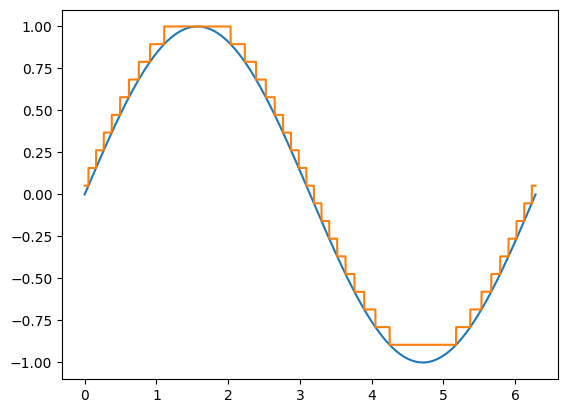

In [10]:
import numpy as np
import matplotlib.pyplot as plt

T = 2*np.pi
ts = np.linspace(0, T, 10000)
sig = np.sin(ts)
bins = np.linspace(-1, 1, 20)
digitized = bins[np.digitize(sig, bins)]

plt.plot(ts, sig, label='true')
plt.plot(ts, digitized, label='digitized')


In [ ]:
true_vel = np.cos(ts)
update_t = np.linspace(0, T, 10)

reg_pos = digitized[::100]

#interrupt_t = np.non_zero(np.diff(digitized))



AttributeError: module 'numpy' has no attribute 'non_zero'

In [33]:
from kdrag.all import *
import kdrag.theories.vec as vec

v,B = smt.Consts("v B", vec.Vec3)
kd.prove(vec.dot(vec.cross(v,B),v) == 0, by=[vec.dot[vec.Vec3].defn, vec.cross.defn])

|- dot(cross(v, B), v) == 0

In [32]:
from kdrag.all import *
m,B,L,I,v,V = smt.Reals("m B L I v V")
g = kd.define("g", [], smt.RealVal(9.8))
lorentz = kd.axiom(m*g == B*L*I)
faraday = kd.axiom(V   == B * L * v)

step1 = kd.prove(smt.Implies(v != 0, B*L == V/v), by=[faraday])
kd.prove(smt.Implies(v != 0, m == V*I/v/g), by=[step1, lorentz, g.defn])

|- Implies(v != 0, m == ((V*I)/v)/g)

Quickcheck physics equations.
